In [1]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
import csv
import time
from os.path import isfile
import pandas as pd
import re
import spacy

model = SentenceTransformer('all-mpnet-base-v2')

In [2]:
import matplotlib.pyplot as plt
embeddings_path = "./archive/encodings.npy"

# Create sentance embeddings
def create_embeddings(model : SentenceTransformer, text : list[str]):
    # Create and save the encodings to the specified file
    print("Hello")
    return np.array(model.encode(text, normalize_embeddings=True))




def find_similarity(model, embeddings, text):
  question_embedding = model.encode(text)
  print(len(question_embedding))
  print(len(embeddings))
  return util.dot_score(embeddings, question_embedding)

def generate_all_text_emeddings(model, text: list[str]):
   return [model.encode(val) for val in text]


nlp = spacy.load('en_core_web_sm')
def split_sentances(text: str):
  #text = text.replace('\n', '').replace('?', '').replace('.', '')

  # Split the string into sentences using regular expression
  return [sent.text for sent in nlp(text).sents]



In [3]:
def prepare_dataframe(df: pd.DataFrame):
    df["Split_Text"] = df["ABSTRACT"].apply(lambda x: split_sentances(x))


df_test = pd.read_csv("./archive/test_tm/test_processed.csv")
df_train = pd.read_csv("./archive/train_tm/train_processed.csv")
df_news = pd.read_json("./archive/news/news.json", lines=True)

vals = np.array([])
#prepare_dataframe(df_train)
#prepare_dataframe(df_test)

df_news.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [4]:
import requests
from bs4 import BeautifulSoup
# df_train.to_csv("./archive/train_tm/train_processed.csv")
# df_test.to_csv("./archive/test_tm/test_processed.csv")

text = BeautifulSoup(requests.get("https://developer.wordpress.org/plugins/plugin-basics/determining-plugin-and-content-directories/").text).text
print(text)


# encoding = create_embeddings(model, text)[0]
# len(encoding)
# # print(encoding)
# for val in text:
#     print(val)






Determining Plugin and Content Directories | Plugin Developer Handbook | WordPress Developer Resources































































 











Skip to content


Log InRegister 






WordPress.org


 







NewsDownload & ExtendGet WordPressThemesPatternsPluginsOpenverseMobileHostingLearnLearn WordPressDocumentationForumsWordPress.tvDevelopersCommunityMake WordPressWordCampMeetupsPhoto DirectoryJob BoardFive for the FutureAboutAbout WordPressShowcaseGutenbergEnterpriseWordPress Swag StoreGet WordPress











Search in WordPress









		Get WordPress	



Menu


Developer Resources























ChaptersIntroduction to Plugin Development

What is a Plugin?


Plugin Basics

Header Requirements
Including a Software License
Activation / Deactivation Hooks
Uninstall Methods
Best Practices
Determining Plugin and Content Directories


Plugin Security

Checking User Capabilities
Data Validation
Securing (sanitizing) Input
Securing (escap

In [5]:
# from os.path import fileExists

def generate_embeddings_from_text(text, filePath=None, save=False):
    all_embeddings = generate_all_text_emeddings(model, text)
    # Save file to server
    if save or filePath != None:
        if filePath != None:
            np.save(filePath, all_embeddings)
        else:
            np.save("./Embeddings/default-embedding")
    return all_embeddings

def load_embeddings(filePath):
    return np.load(filePath)
        
#all_embeddings = generate_embeddings_from_text(text, filePath="./Encodings/wordpress-encodings.npy", save=True)


In [6]:
#np.save("./wordpress_encodings.npy", all_embeddings)

In [7]:
# results = [None] * len(text)
# results = np.ones((len(all_embeddings), len(all_embeddings)))
# print(results.shape)
# for i in range(len(all_embeddings)):
#     for j in range(len(all_embeddings)):
#         if i != j:
#             print(f"Iterator {i} given {j}")
#             results[i,j] = util.dot_score(all_embeddings[i], all_embeddings[j])


In [8]:
#print(results)

In [9]:
# # Initialize avg array
# avg = [[None] * 2 for _ in range(len(results)) ]
# # calculate all average values found in the results
# for i in range(len(results)):
#     temp = results[i]
#     np.delete(temp, i)
#     avg[i][0] = np.sum(temp) / len(temp)
#     avg[i][1] = i

# avg.sort(key=lambda x: x[0])

In [10]:
def plot(tensor, tensor2=None, title='Similarity scores', secondTensor=False):
  x = np.arange(len(tensor))
  y = tensor
  plt.plot(x,y)
  if secondTensor:
    plt.plot(x, tensor2)
  plt.xlabel('Sample Number')
  plt.ylabel('Similarity')
  plt.title(title)
  plt.show()


# sim_vals = [[avg[i][0] for i in range(len(avg))]][0]
# sim_ids =  [[avg[i][1] for i in range(len(avg))]][0]
# plot([avg[i][0] for i in range(len(avg))])

# threshold = 0.01
# val1 = sim_vals[0]

# indices = []
# for i in range(1, len(sim_vals)):
#     val2 = sim_vals[i]
#     val = val2 - val1
#     print(f"Val: {val}")
#     if val <= threshold:
#         indices.append([i-1, i])
#     val1 = val2

# print(indices)

In [11]:
pairs = [[None] * 2 for _ in range(len(indices))]
for i in range(len(indices)):
    pairs[i][0] = sim_ids[indices[i][0]]
    pairs[i][1] = sim_ids[indices[i][1]]
print(pairs)
print(f"Text 1: {text[pairs[0][1]]}")
print(f"Text 2: {text[pairs[0][0]]}")
print(f"Text: {text[2]}")

NameError: name 'indices' is not defined

In [12]:
arr_string = [  "You punched me",
                "I didn't punch you",
                "Harsh language", 
              "Polite language", 
              "Clean language", 
              "Biased language", 
              "Unbiased language", 
              "Right wing language", 
              "Left wing language", 
              "Political language", 
              "Helpful language",
              "I'll probably get there by car",    
              "I'll travel by horse",    
              "She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots",    
              "He later acknowledged criticism of his remark about the pandemic being over and clarified the pandemic is “not where it was.” The initial comment didn't bother Murphy"]


arr = [model.encode(sent, normalize_embeddings=True) for sent in arr_string]

comparisons = np.zeros((len(arr), len(arr)))

for i in range(len(arr)):
    for j in range(len(arr)):
        comparisons[i,j] = util.dot_score(arr[i], arr[j])



RuntimeError: CUDA error: CUDA-capable device(s) is/are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
comp1 = 0
comp2 = 1
print(f"{arr_string[comp1]}")
print(comparisons[comp1])
print(f"{arr_string[comp2]}")
print(comparisons[comp2])

Biased language
[ 0.50529718  0.407471    0.43018544  1.          0.73297691  0.56852144
  0.52301168  0.51151037  0.45656312 -0.03307548  0.108307    0.09544481
  0.15024701]
Unbiased language
[ 0.33961684  0.40226516  0.53889847  0.73297691  1.          0.43936357
  0.44226032  0.49375159  0.5239355  -0.02400045  0.16390264  0.07530002
  0.14444435]


## Checking the similarity between different embeddings with similar scores but opposite meaning

In [ ]:
print(arr[5])

[-1.49760973e-02  7.35205458e-03  3.25238751e-03  3.65862586e-02
 -4.34427559e-02  2.09170654e-02 -5.02943695e-02  1.55569091e-02
 -2.23791935e-02 -5.84860854e-02 -2.89355386e-02 -2.52331439e-02
 -1.46179954e-02  7.33121997e-03  5.04070288e-03 -3.93353514e-02
  5.41447848e-02  5.20499013e-02  4.00909036e-02 -3.26802768e-02
 -2.60575730e-02  2.82610022e-02 -1.10436417e-02  1.21597049e-03
 -1.39337340e-02 -3.09472792e-02  3.60320657e-02 -1.95433665e-03
  2.09994875e-02  2.15213038e-02 -1.59347113e-02  2.01663151e-02
 -4.52257395e-02 -2.77258549e-02  1.47052560e-06 -1.07692955e-02
  5.58414776e-03 -2.37547457e-02  1.21474569e-03 -4.61303294e-02
  1.23604551e-01  9.81608313e-03 -4.44966294e-02  6.41056476e-03
 -5.90079091e-02 -6.44895621e-03  3.56136113e-02  4.76105772e-02
 -1.23429392e-02  1.74851548e-02  2.92034820e-02 -5.52839600e-02
 -4.25439365e-02 -3.12413182e-02 -9.86331888e-03  5.34738647e-03
  2.79725082e-02 -5.71436174e-02  3.53242755e-02 -5.79248741e-03
 -6.38863146e-02 -2.63301

In [ ]:
print(arr[6])

[-2.36443002e-02 -1.88745242e-02  5.48311323e-03  5.93191274e-02
 -4.54579107e-02  1.66820642e-02 -4.44256179e-02  2.11442783e-02
 -1.51934009e-02 -4.94552702e-02 -2.31075697e-02 -2.96358913e-02
 -2.61269305e-02  1.25135090e-02  1.75805259e-02 -3.92660908e-02
  6.12285547e-02  4.23312597e-02  8.24248476e-04 -3.06779314e-02
 -3.12627703e-02  2.80449167e-02 -8.59851763e-03  8.38342309e-03
  3.43782343e-02 -2.59303898e-02  8.32666829e-03  3.81797412e-03
  2.10932363e-02  4.45365310e-02 -2.10295022e-02  6.00589847e-04
 -4.17098068e-02 -4.13486436e-02  1.45119805e-06 -9.47088934e-03
 -1.53908674e-02 -5.47220148e-02  1.50994174e-02 -5.48762307e-02
  9.57567915e-02  6.26950758e-03 -5.16630597e-02  3.86796729e-03
 -6.82688877e-02  3.14655132e-03  4.75279614e-02  5.24486527e-02
 -2.22172998e-02  1.58583671e-02  3.96370441e-02 -4.06109132e-02
 -5.18915802e-02 -3.12261526e-02  2.16926839e-02  1.19960783e-02
  1.77699756e-02 -4.94777784e-02  4.12865989e-02 -1.29303830e-02
 -7.42260814e-02 -9.37080

Plotting the difference between two embeddings interestingly seem to follow a noisy wave pattern? What does this mean?

Normalized Parameter Difference (De-Noised)


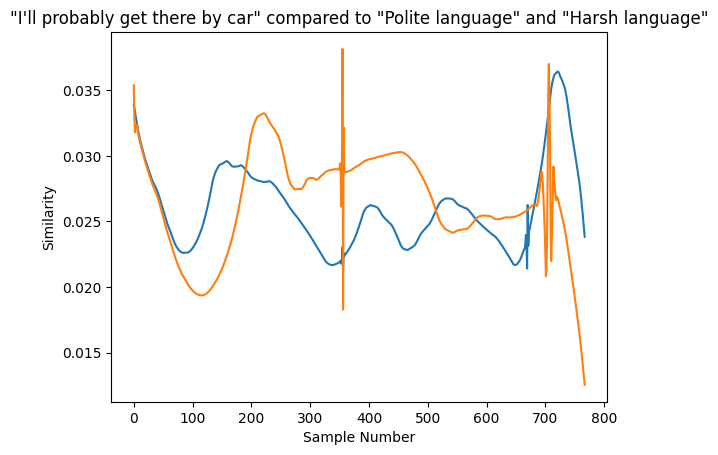

Anchor Sentence: I'll probably get there by car
Similarity Score for Polite language: 0.08106925338506699
Similarity Score for Harsh language: 0.034135427325963974


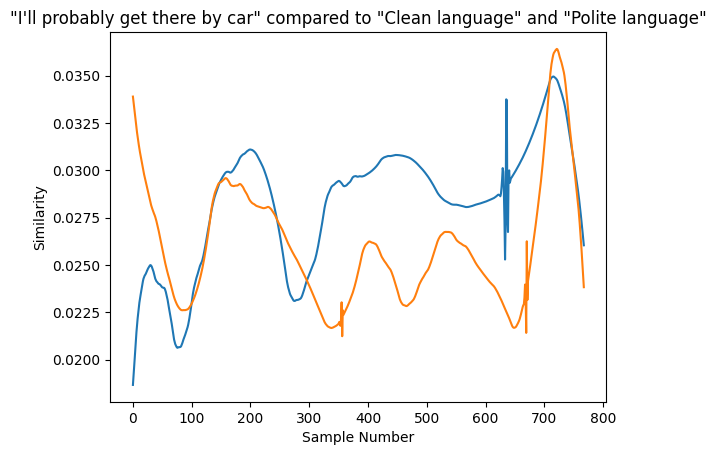

Anchor Sentence: I'll probably get there by car
Similarity Score for Clean language: -0.014658154919743538
Similarity Score for Polite language: 0.08106925338506699


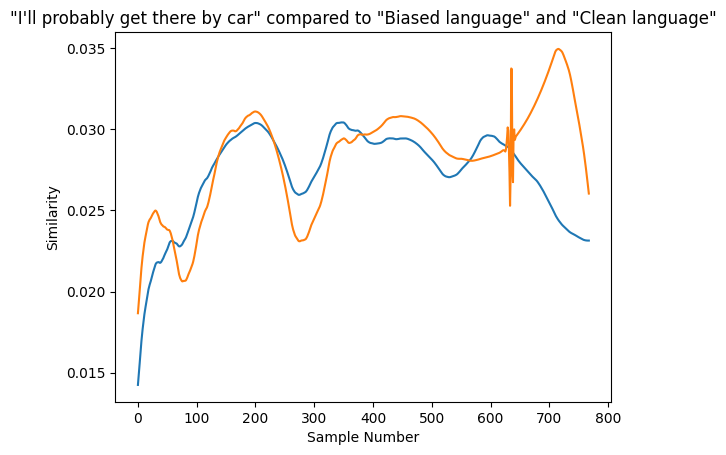

Anchor Sentence: I'll probably get there by car
Similarity Score for Biased language: -0.0330754779279232
Similarity Score for Clean language: -0.014658154919743538


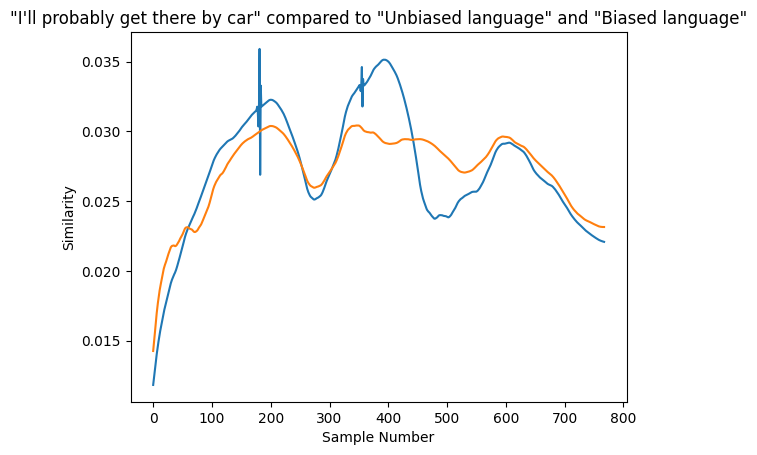

Anchor Sentence: I'll probably get there by car
Similarity Score for Unbiased language: -0.02400045096874237
Similarity Score for Biased language: -0.0330754779279232


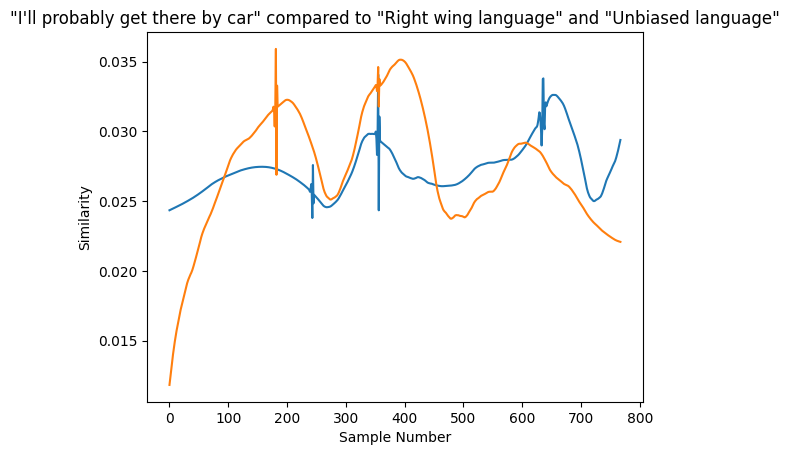

Anchor Sentence: I'll probably get there by car
Similarity Score for Right wing language: -0.06499768793582916
Similarity Score for Unbiased language: -0.02400045096874237


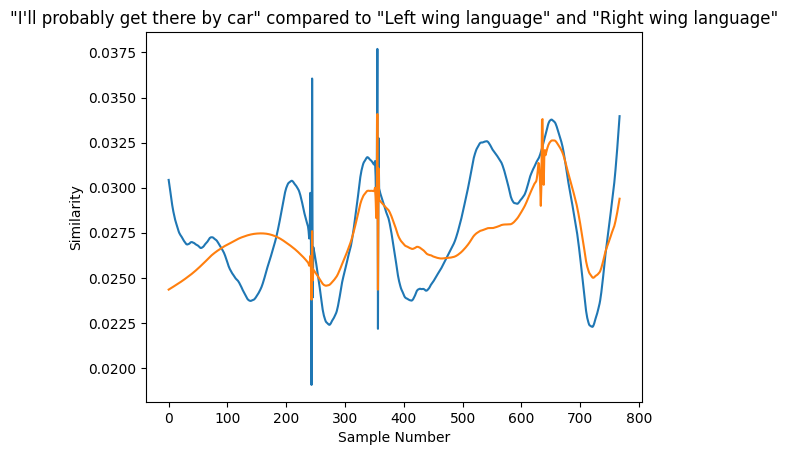

Anchor Sentence: I'll probably get there by car
Similarity Score for Left wing language: -0.05233141779899597
Similarity Score for Right wing language: -0.06499768793582916


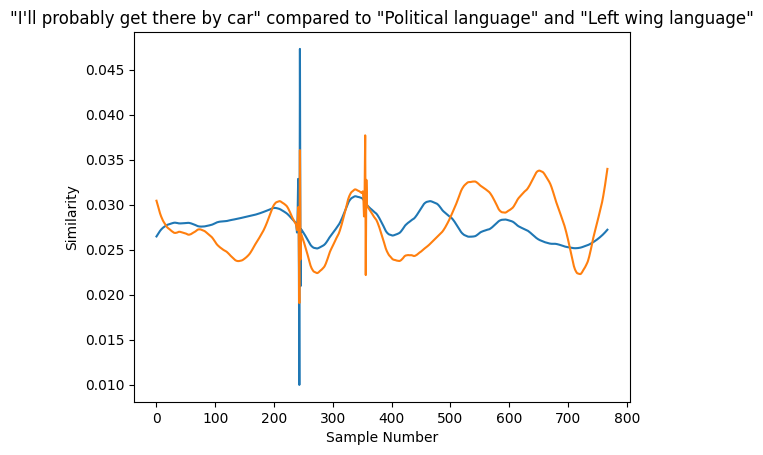

Anchor Sentence: I'll probably get there by car
Similarity Score for Political language: -0.004115323536098003
Similarity Score for Left wing language: -0.05233141779899597


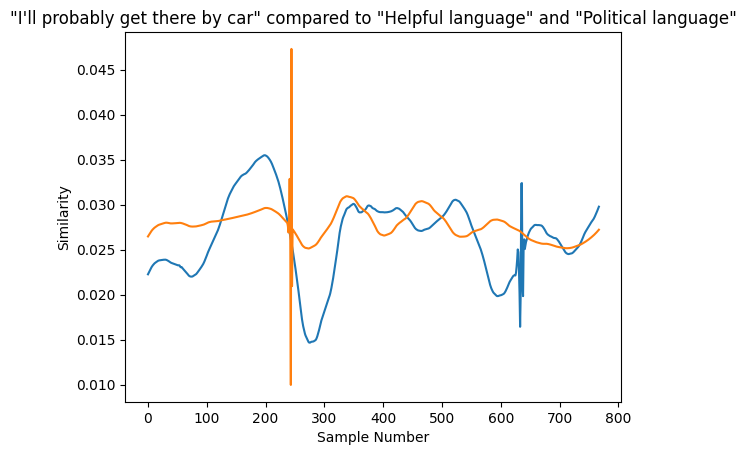

Anchor Sentence: I'll probably get there by car
Similarity Score for Helpful language: 0.05444969981908798
Similarity Score for Political language: -0.004115323536098003


/home/marcuswrrn/.local/lib/python3.10/site-packages/pywt/_thresholding.py:23: RuntimeWarning: invalid value encountered in divide
  thresholded = (1 - value/magnitude)


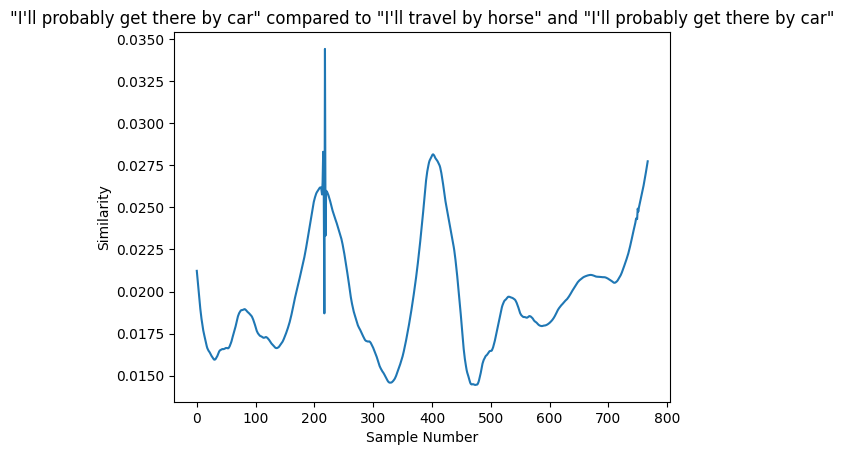

Anchor Sentence: I'll probably get there by car
Similarity Score for I'll travel by horse: 0.45215851068496704
Similarity Score for I'll probably get there by car: 1.0


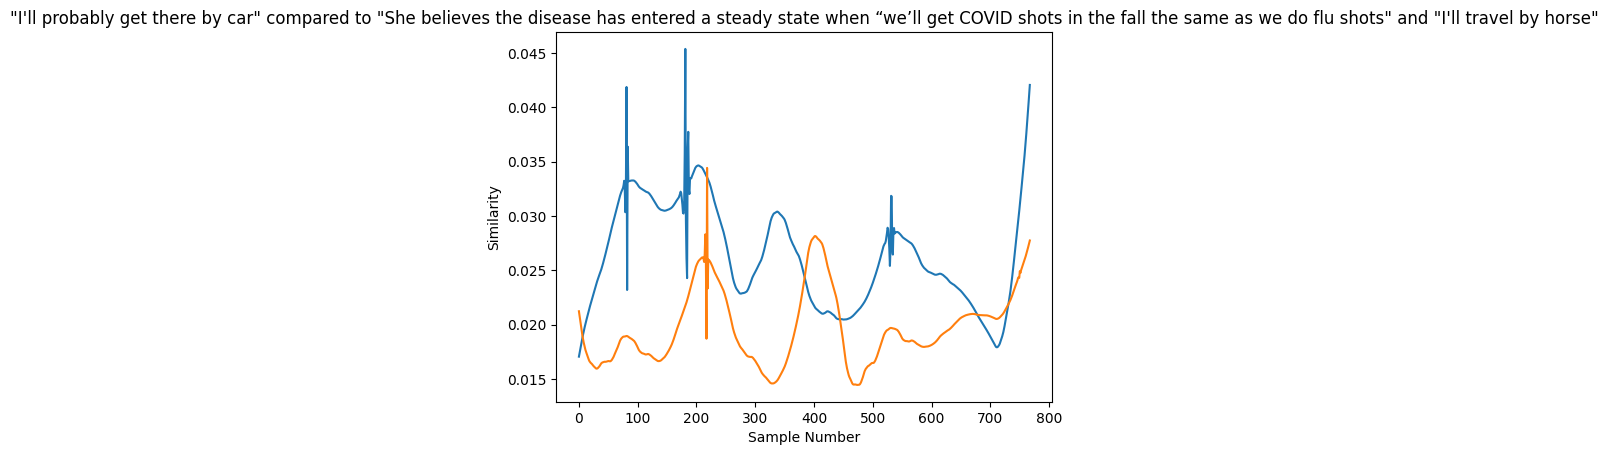

Anchor Sentence: I'll probably get there by car
Similarity Score for She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots: 0.012259943410754204
Similarity Score for I'll travel by horse: 0.45215851068496704


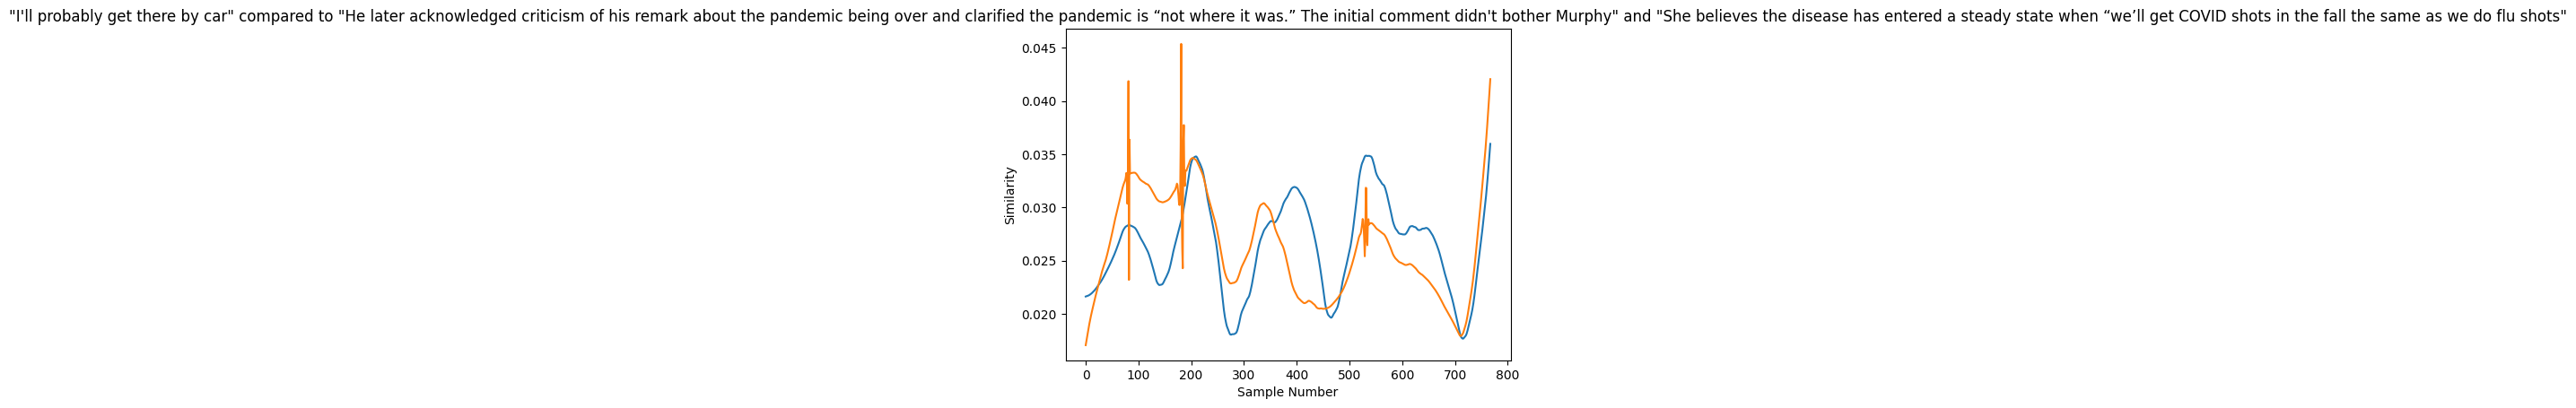

Anchor Sentence: I'll probably get there by car
Similarity Score for He later acknowledged criticism of his remark about the pandemic being over and clarified the pandemic is “not where it was.” The initial comment didn't bother Murphy: -0.05074618384242058
Similarity Score for She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots: 0.012259943410754204


In [ ]:
# print(comparisons[3])
# print(comparisons[4])
import pywt
def denoize(arr):
    coeffs = pywt.wavedec(arr, 'db4', level=6)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    threshold = sigma * np.sqrt(2 * np.log(len(arr)))
    coeffs = [pywt.threshold(c, threshold, 'soft') for c in coeffs]
    return pywt.waverec(coeffs, 'db4')


def plot_denoized(arr, title=None):
    x_denoised = denoize(np.abs(arr))
    if title != None:
        plot(x_denoised, title=title)
    else:
        plot(x_denoised)



def compare_denoized(arr1, arr2, title=None, secondTensor=False):
    if title != None:
        plot(denoize(arr1), denoize(arr2), title, secondTensor=secondTensor)
    else:
        plot(denoize(arr1), denoize(arr2), secondTensor=secondTensor)



def compare(arr1, arr2, title=None, secondTensor=False):
    if title != None:
        plot(arr1, arr2, title, secondTensor=secondTensor)
    else:
        plot(arr1, arr2, secondTensor=secondTensor)

base = 9
base2 = 5

print("Normalized Parameter Difference (De-Noised)")
for i in range(1, len(arr)):
    if base == i:
        continue
    val = arr[base] * arr[i]
    #val_sorted = np.sort(val)
    compare_denoized(np.abs(arr[i] - arr[base]), np.abs(arr[i - 1] - arr[base]), title=f"\"{arr_string[base]}\" compared to \"{arr_string[i]}\" and \"{arr_string[i -1]}\"", secondTensor=True)
    print(f"Anchor Sentence: {arr_string[base]}")
    print(f"Similarity Score for {arr_string[i]}: {util.dot_score(arr[base], arr[i])[0][0]}")
    print(f"Similarity Score for {arr_string[i - 1]}: {util.dot_score(arr[base], arr[i - 1])[0][0]}")

# val = np.abs(arr[6] - arr[7])
# val_sorted = np.sort(val)
# plot(val_sorted)

Normalized Parameter Difference


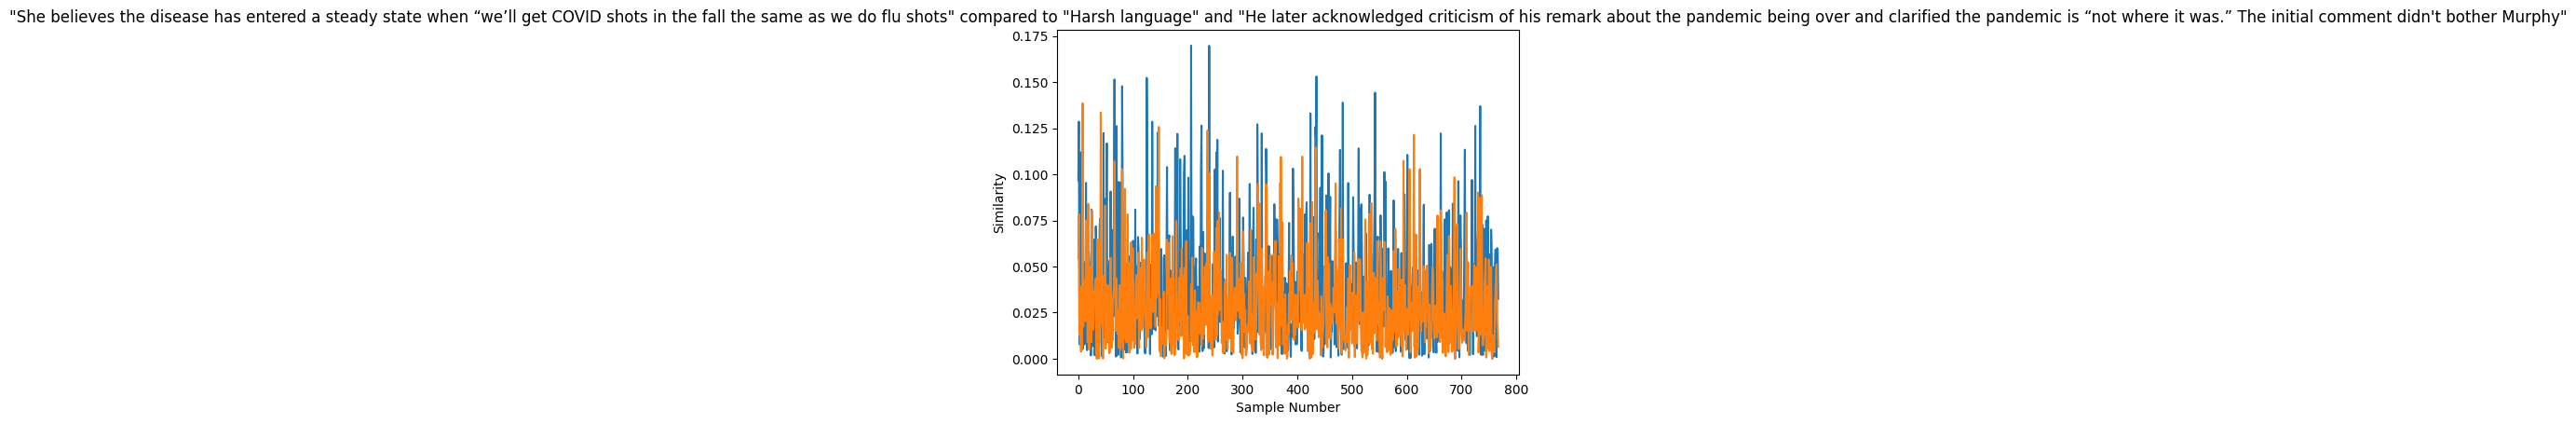

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for Harsh language: 0.018549595028162003
Similarity Score for He later acknowledged criticism of his remark about the pandemic being over and clarified the pandemic is “not where it was.” The initial comment didn't bother Murphy: 0.441463440656662


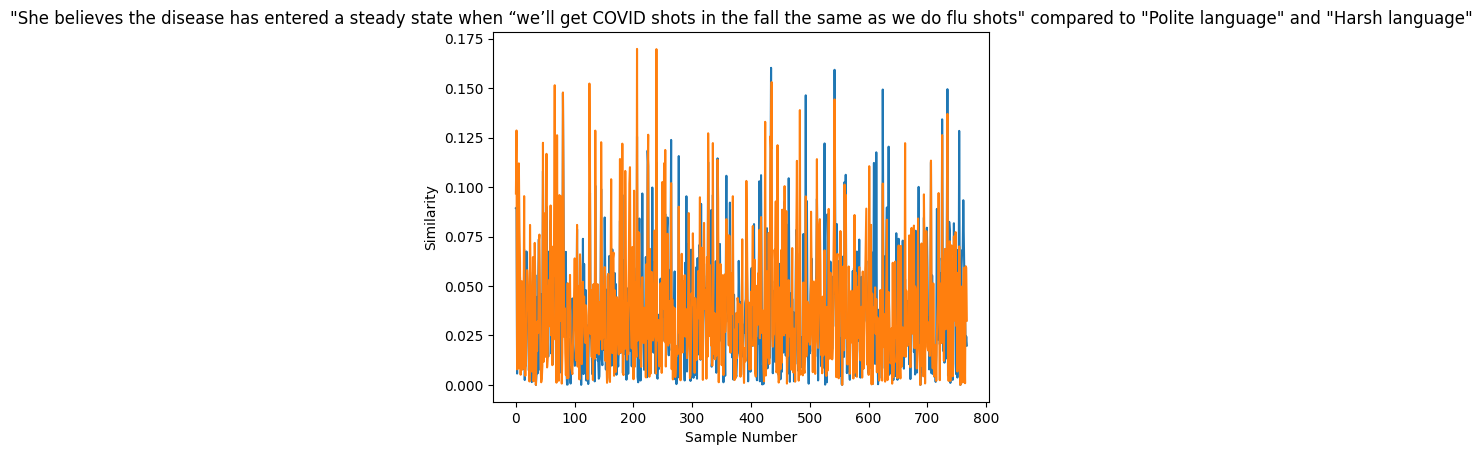

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for Polite language: 0.140840083360672
Similarity Score for Harsh language: 0.018549595028162003


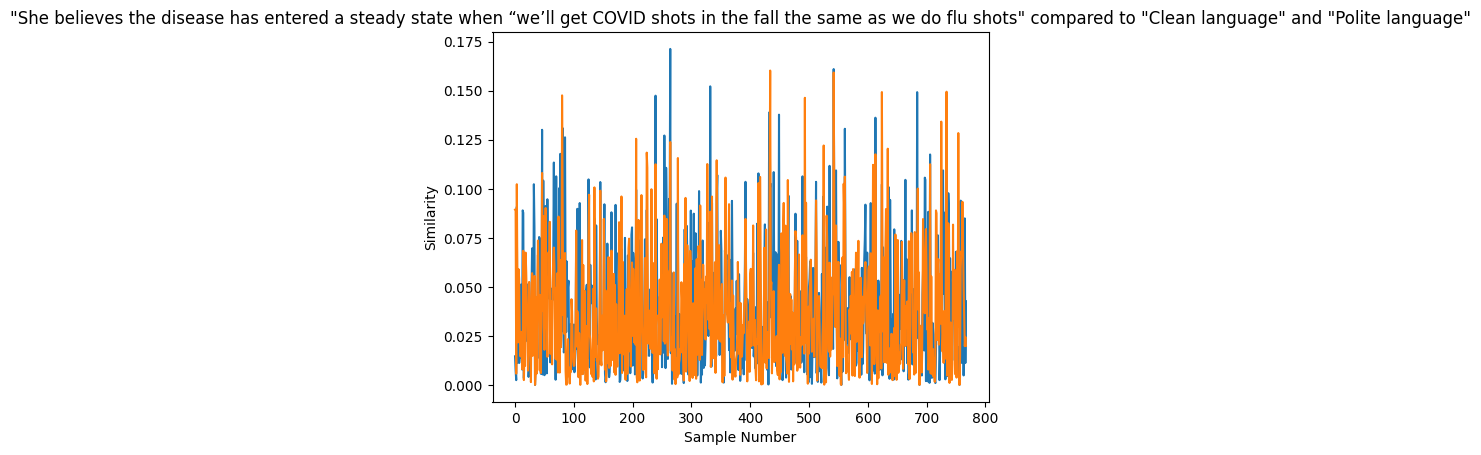

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for Clean language: 0.03943708539009094
Similarity Score for Polite language: 0.140840083360672


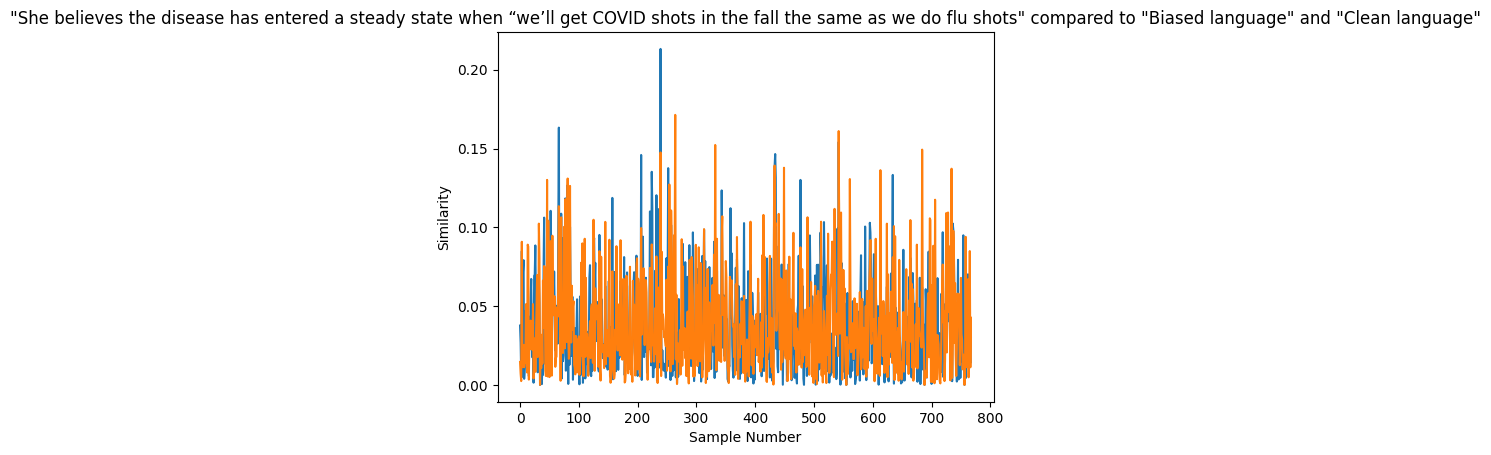

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for Biased language: 0.09544481337070465
Similarity Score for Clean language: 0.03943708539009094


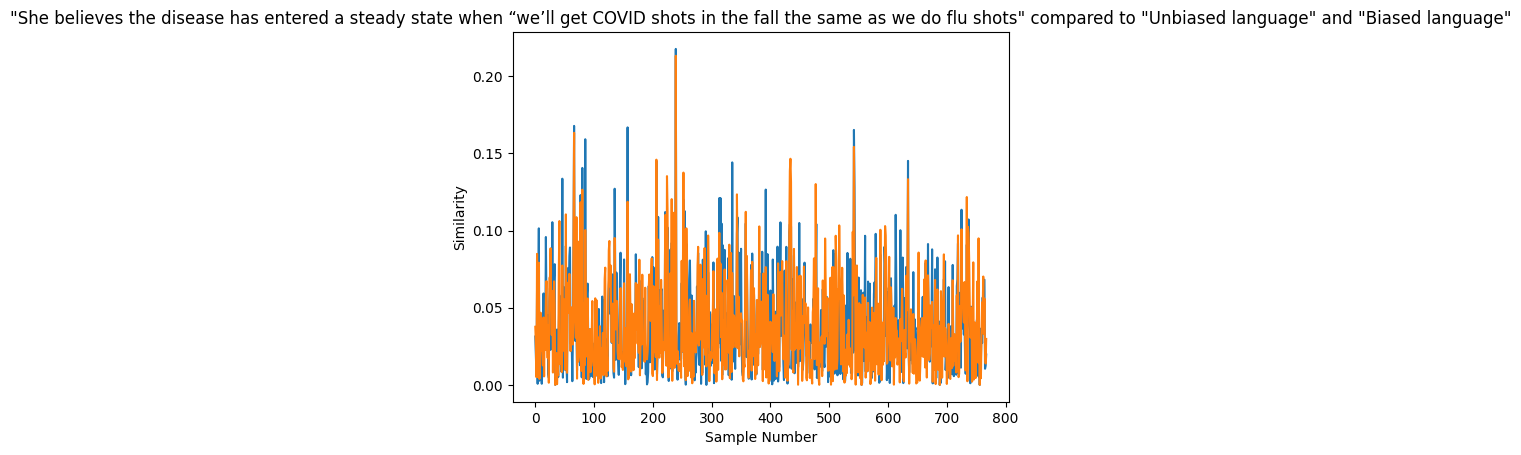

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for Unbiased language: 0.07530001550912857
Similarity Score for Biased language: 0.09544481337070465


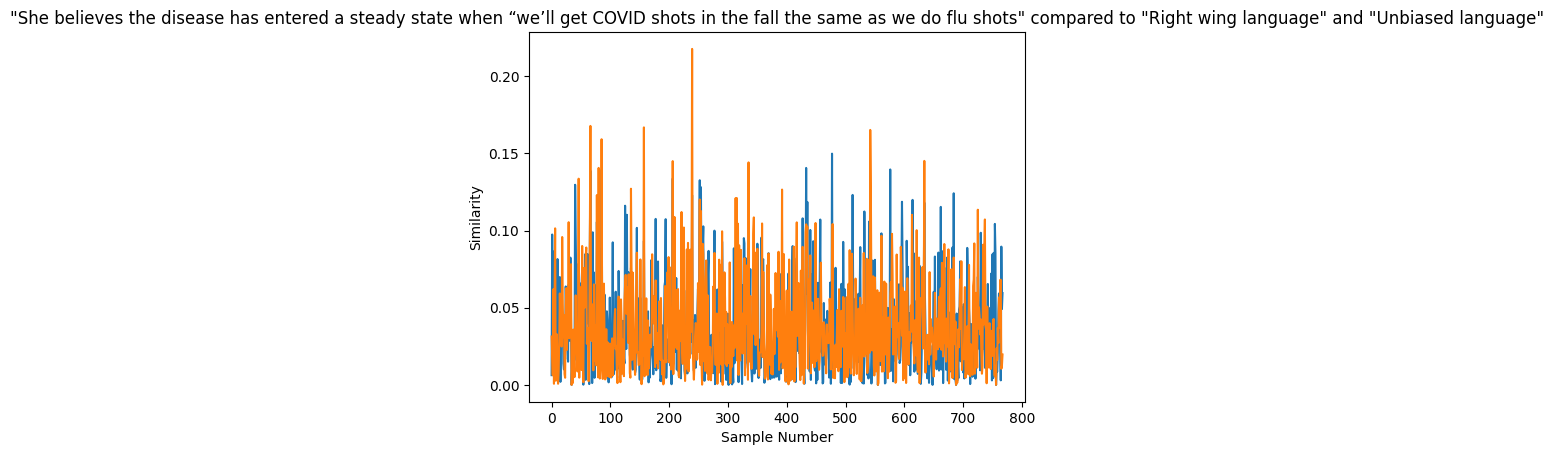

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for Right wing language: 0.1134188324213028
Similarity Score for Unbiased language: 0.07530001550912857


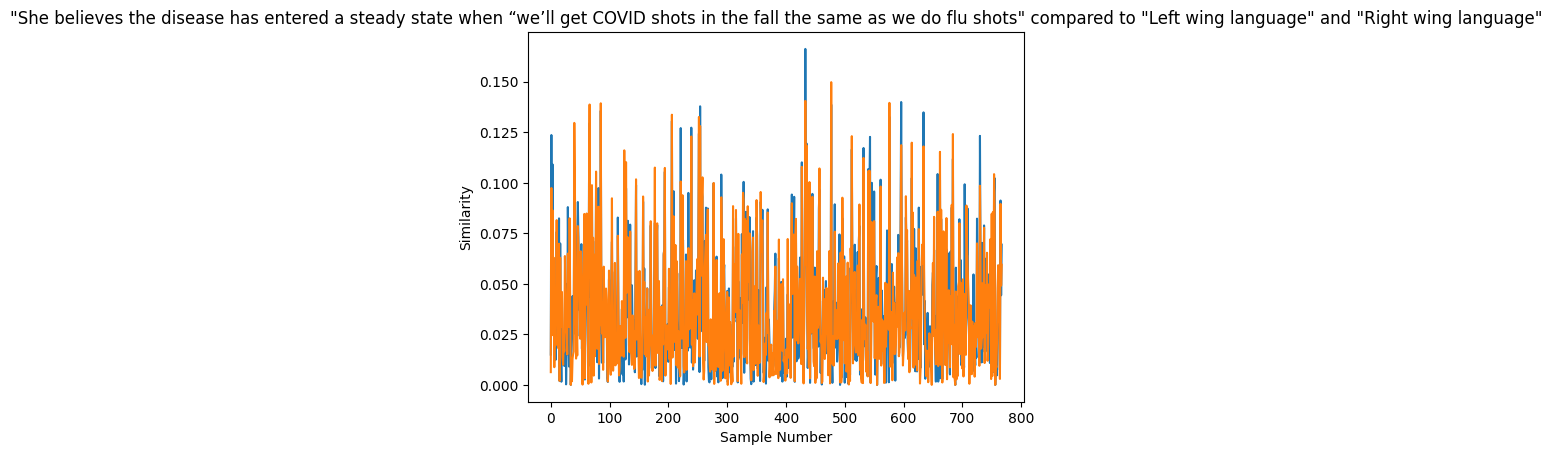

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for Left wing language: 0.09962496161460876
Similarity Score for Right wing language: 0.1134188324213028


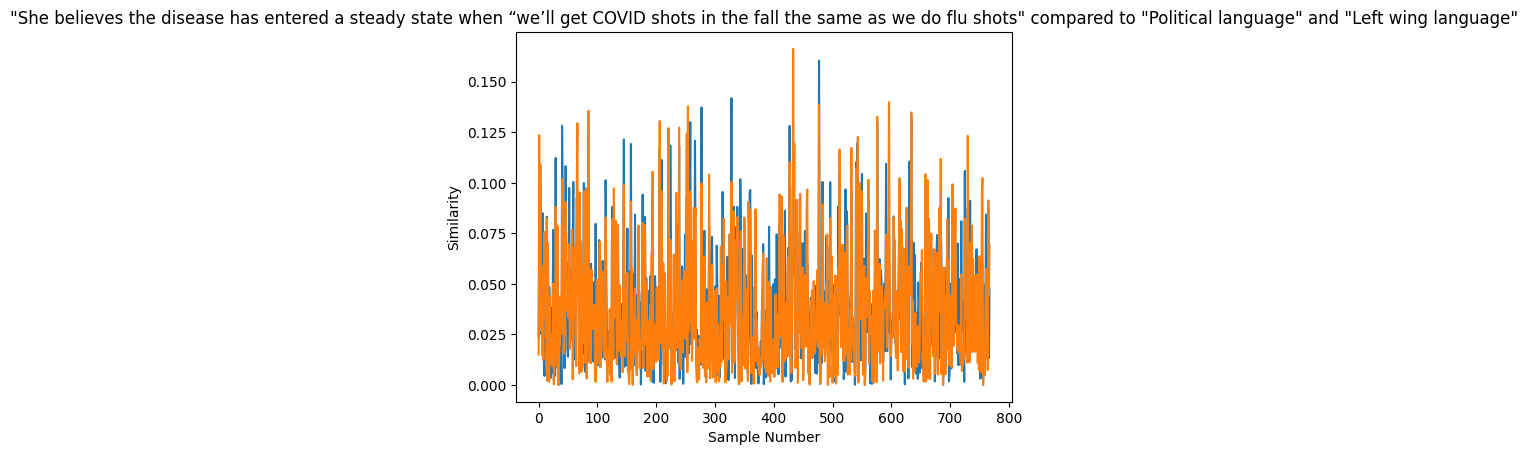

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for Political language: 0.08777561783790588
Similarity Score for Left wing language: 0.09962496161460876


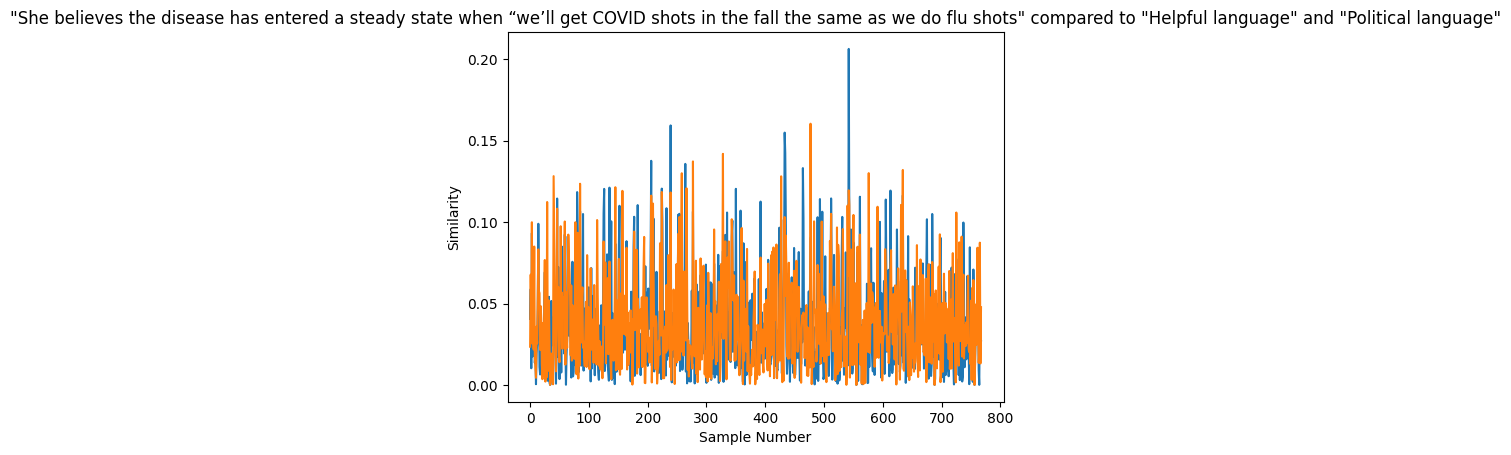

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for Helpful language: 0.10910335183143616
Similarity Score for Political language: 0.08777561783790588


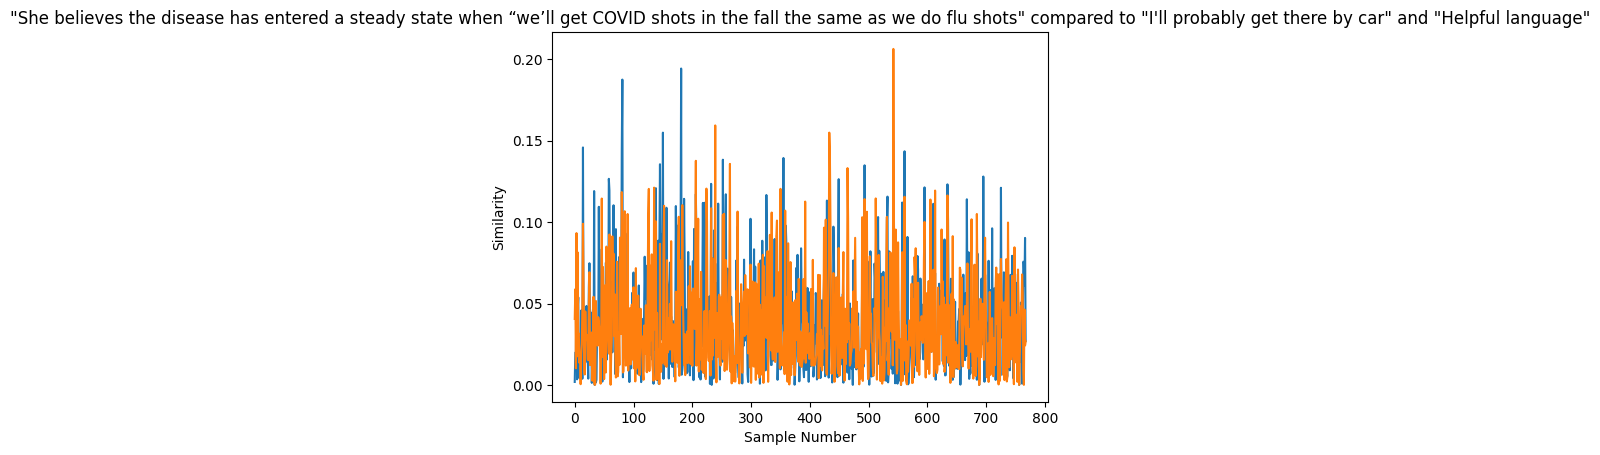

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for I'll probably get there by car: 0.012259943410754204
Similarity Score for Helpful language: 0.10910335183143616


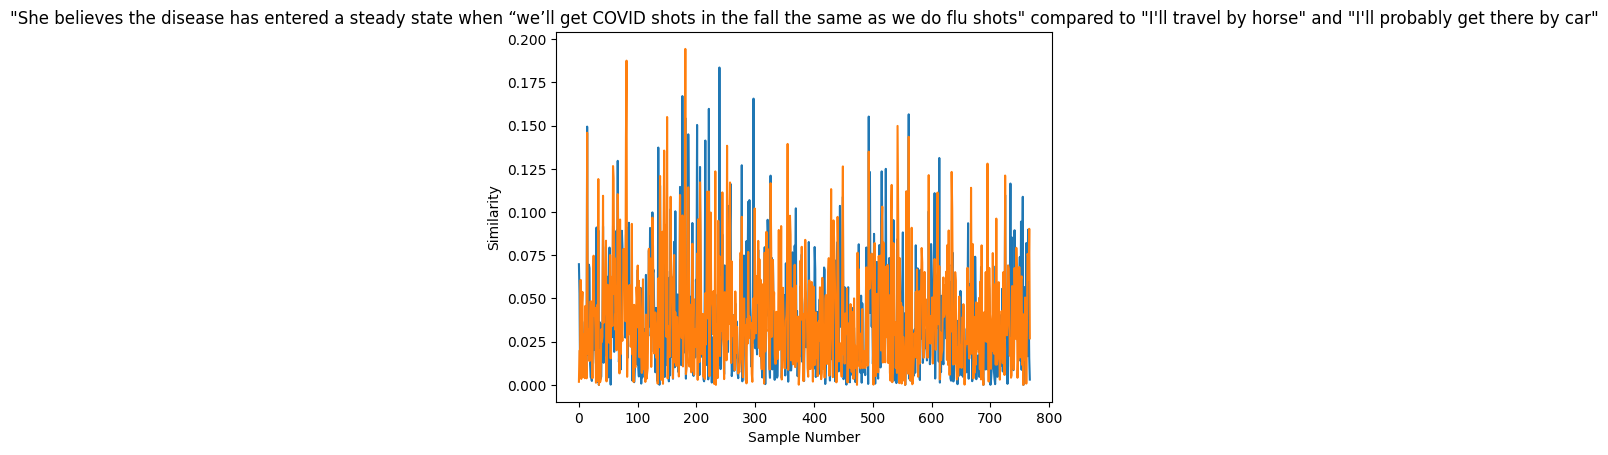

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for I'll travel by horse: 0.05884511023759842
Similarity Score for I'll probably get there by car: 0.012259943410754204


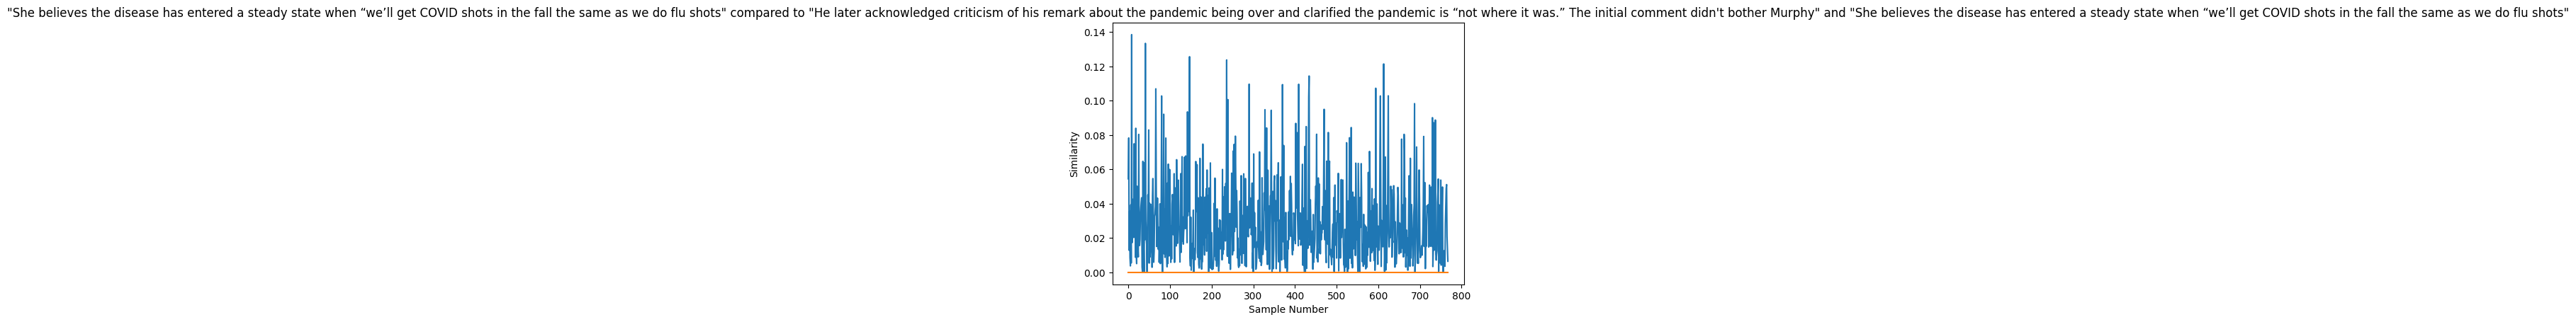

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for He later acknowledged criticism of his remark about the pandemic being over and clarified the pandemic is “not where it was.” The initial comment didn't bother Murphy: 0.441463440656662
Similarity Score for She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots: 1.0


In [ ]:
print("Normalized Parameter Difference")

for i in range(len(arr)):
    if base == i:
        continue
    val = arr[base] * arr[i]
    compare(np.abs(arr[i] - arr[base]), np.abs(arr[i-1] - arr[base]), title=f"\"{arr_string[base]}\" compared to \"{arr_string[i]}\" and \"{arr_string[i -1]}\"", secondTensor=True)
    print(f"Anchor Sentence: {arr_string[base]}")
    print(f"Similarity Score for {arr_string[i]}: {util.dot_score(arr[base], arr[i])[0][0]}")
    print(f"Similarity Score for {arr_string[i - 1]}: {util.dot_score(arr[base], arr[i - 1])[0][0]}")

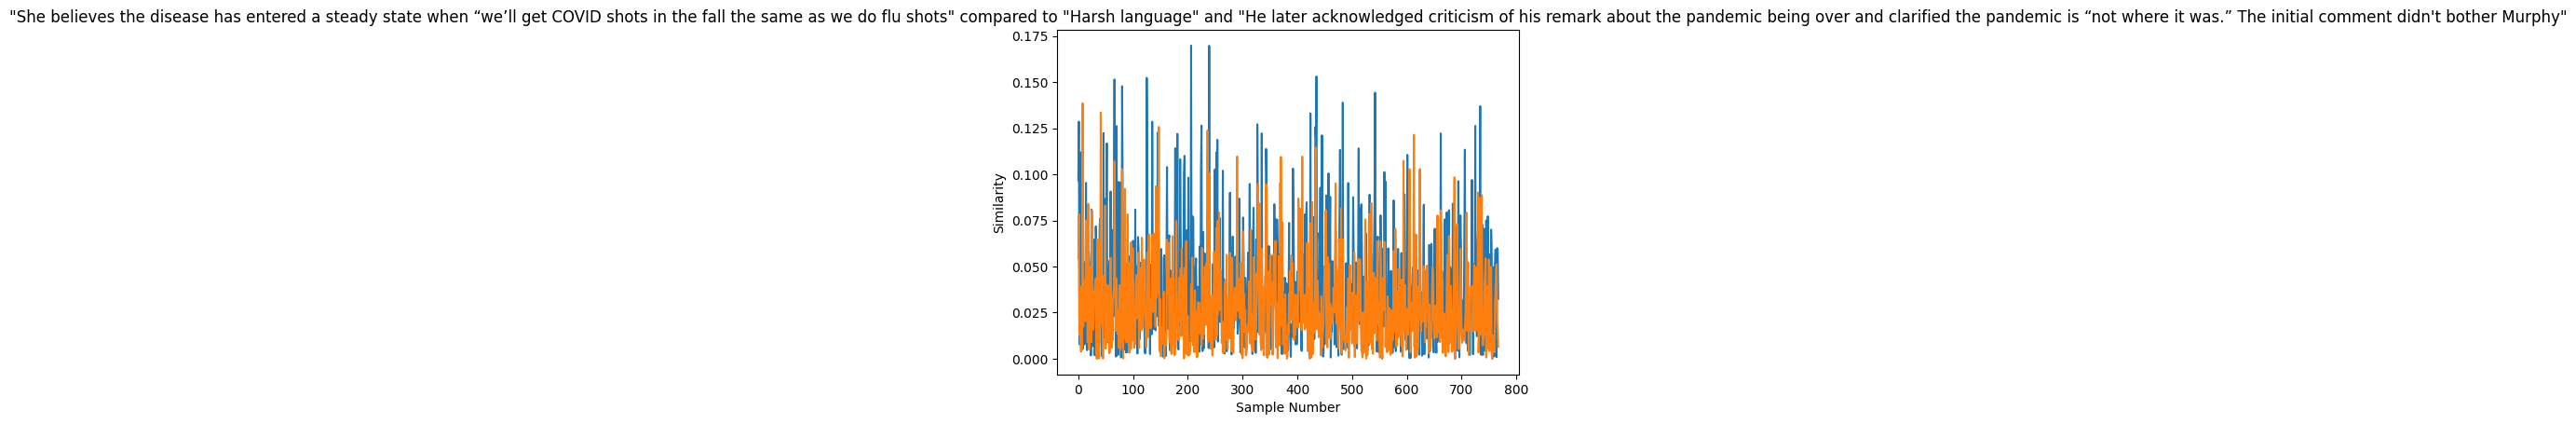

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for Harsh language: 0.018549595028162003
Similarity Score for He later acknowledged criticism of his remark about the pandemic being over and clarified the pandemic is “not where it was.” The initial comment didn't bother Murphy: 0.441463440656662


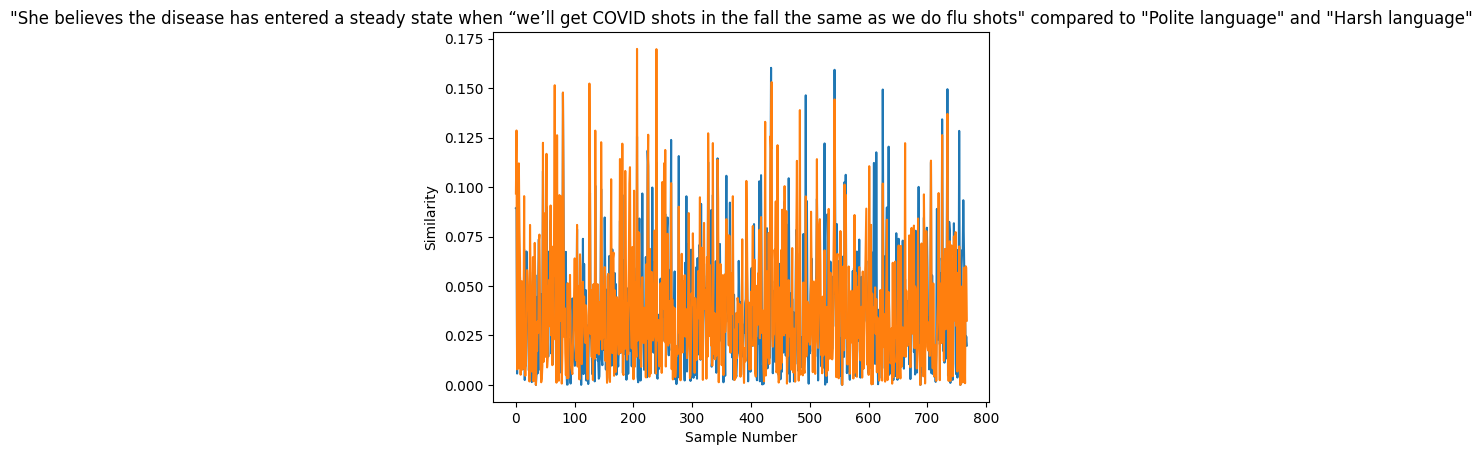

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for Polite language: 0.140840083360672
Similarity Score for Harsh language: 0.018549595028162003


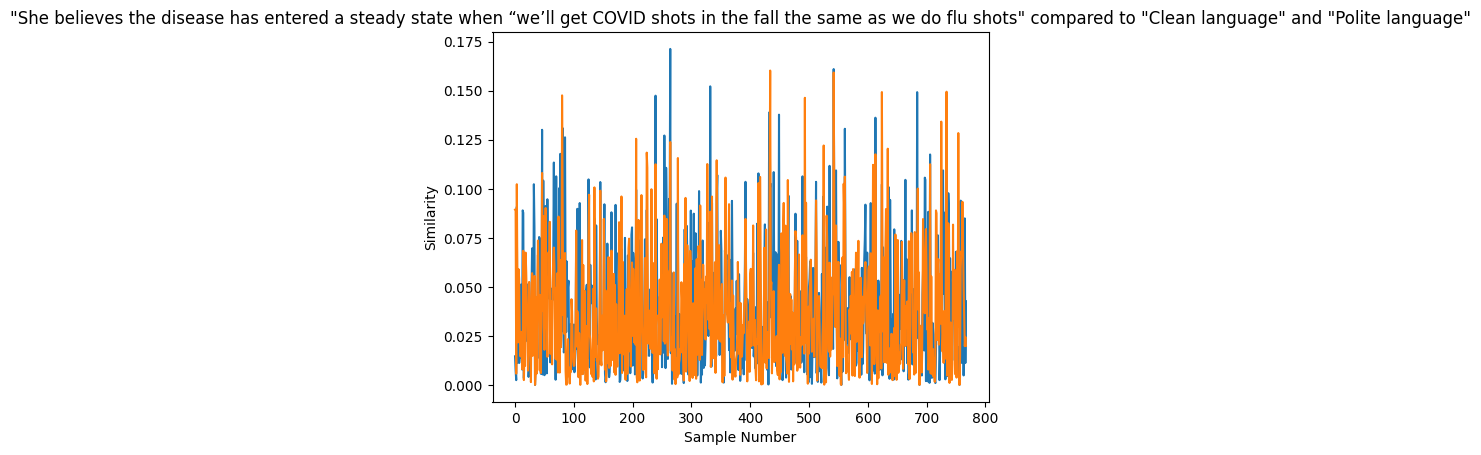

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for Clean language: 0.03943708539009094
Similarity Score for Polite language: 0.140840083360672


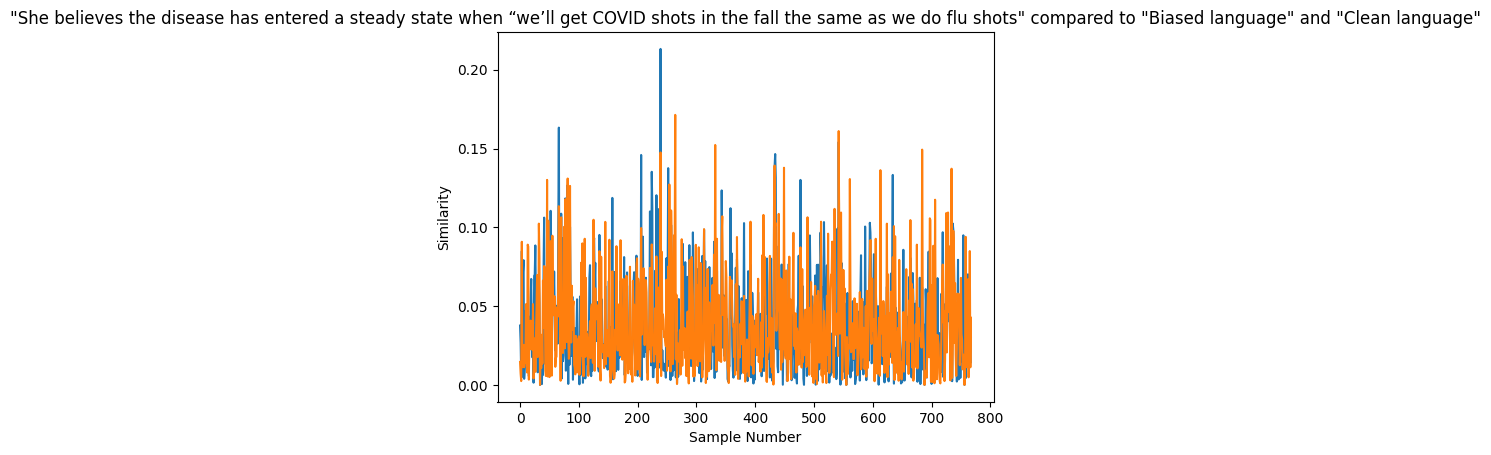

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for Biased language: 0.09544481337070465
Similarity Score for Clean language: 0.03943708539009094


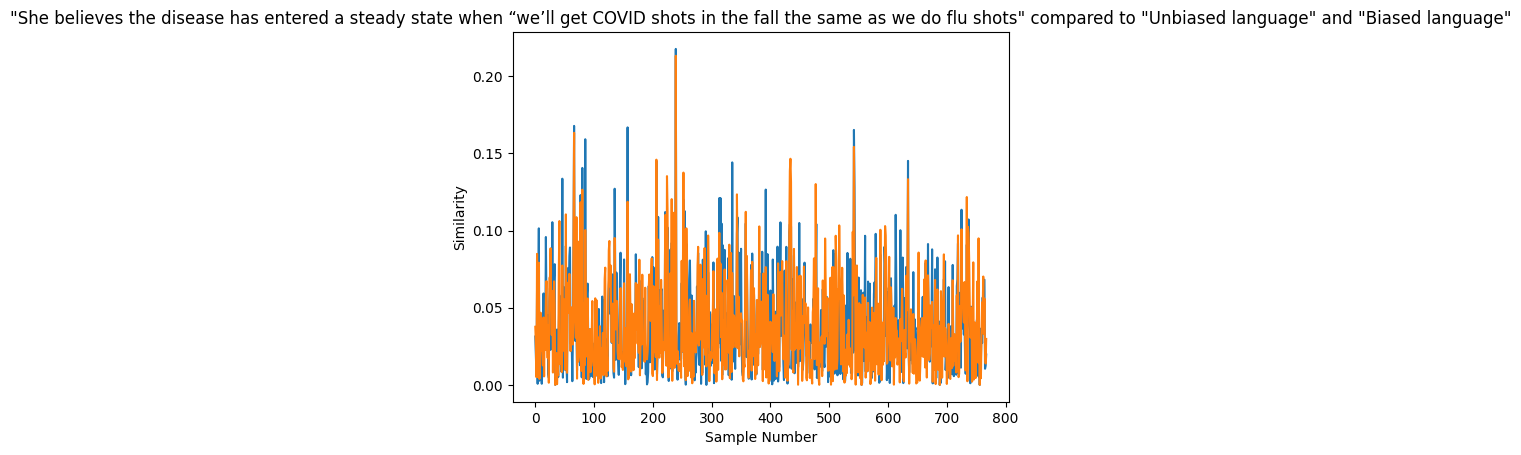

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for Unbiased language: 0.07530001550912857
Similarity Score for Biased language: 0.09544481337070465


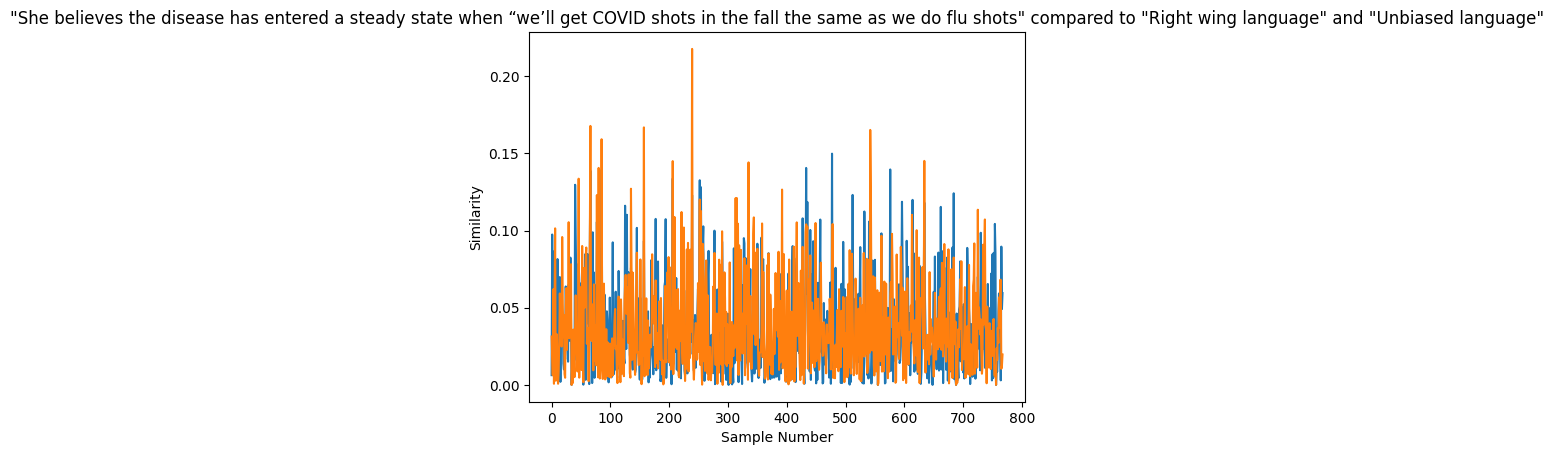

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for Right wing language: 0.1134188324213028
Similarity Score for Unbiased language: 0.07530001550912857


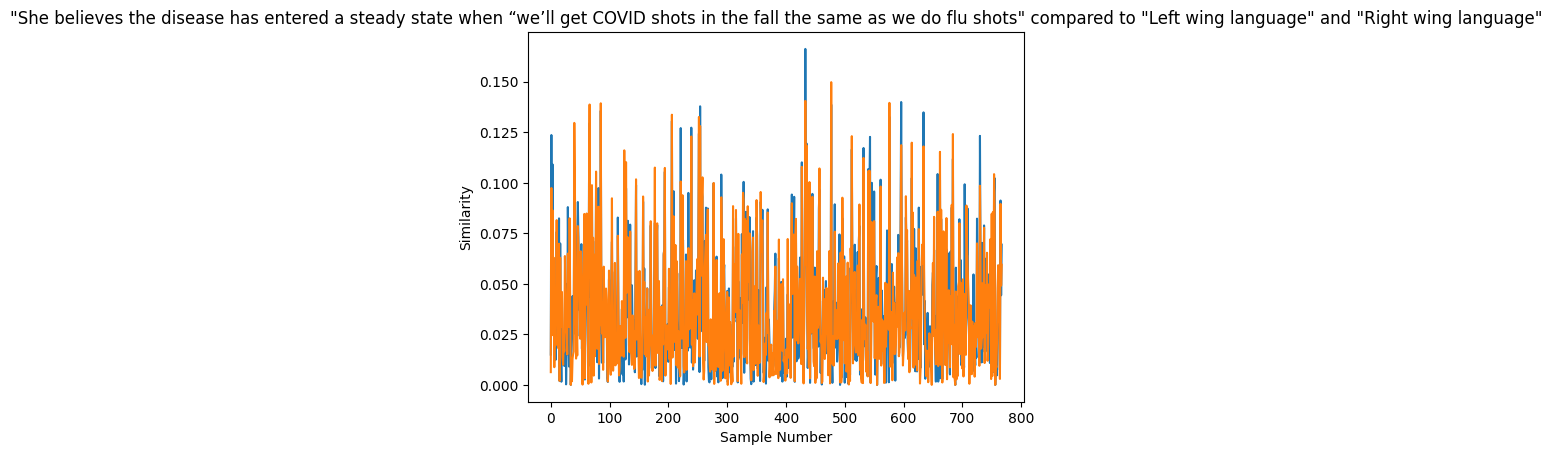

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for Left wing language: 0.09962496161460876
Similarity Score for Right wing language: 0.1134188324213028


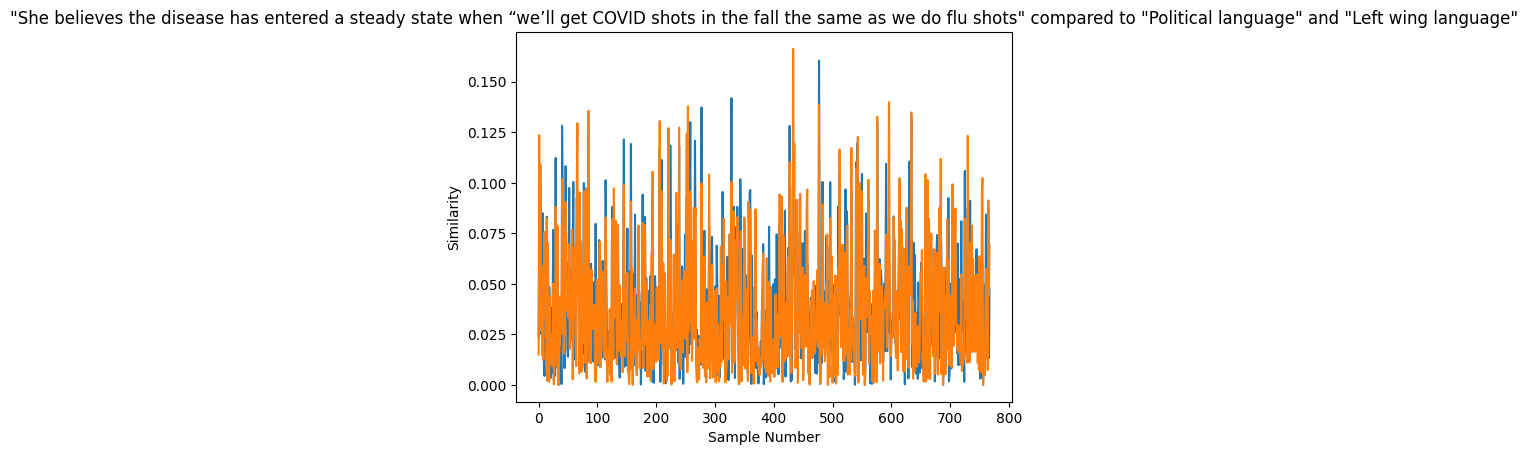

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for Political language: 0.08777561783790588
Similarity Score for Left wing language: 0.09962496161460876


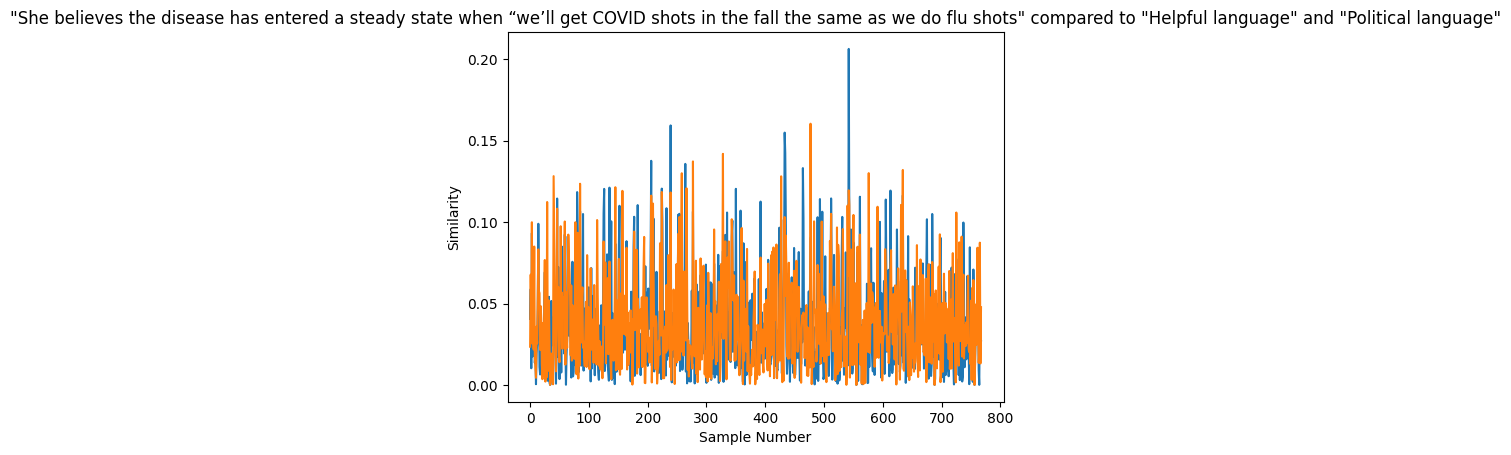

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for Helpful language: 0.10910335183143616
Similarity Score for Political language: 0.08777561783790588


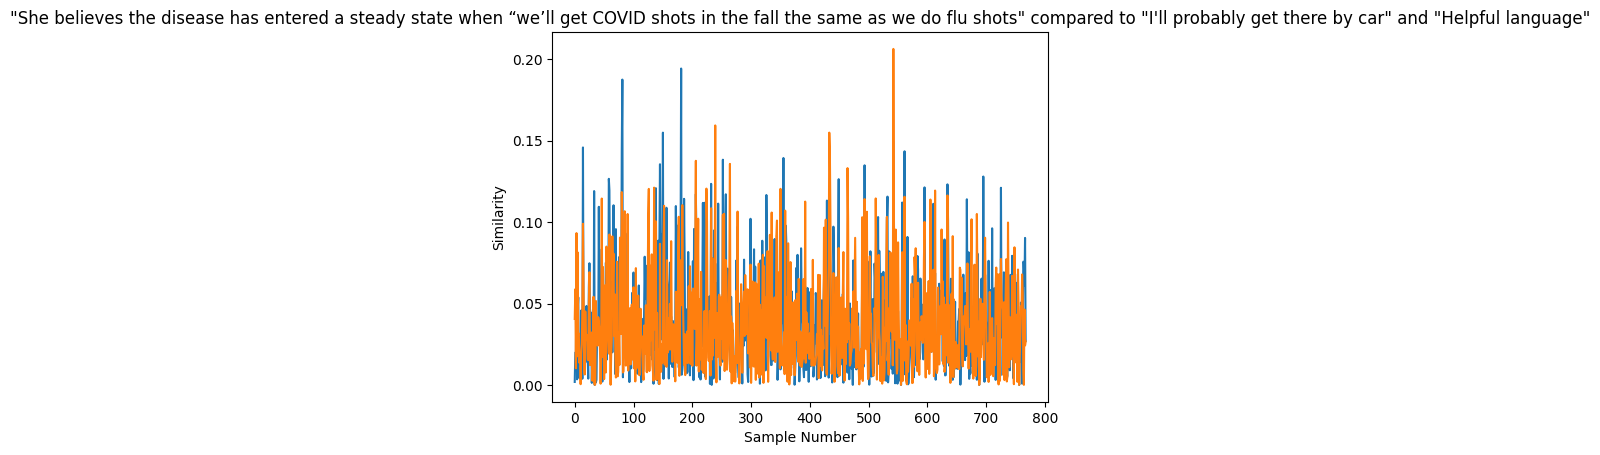

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for I'll probably get there by car: 0.012259943410754204
Similarity Score for Helpful language: 0.10910335183143616


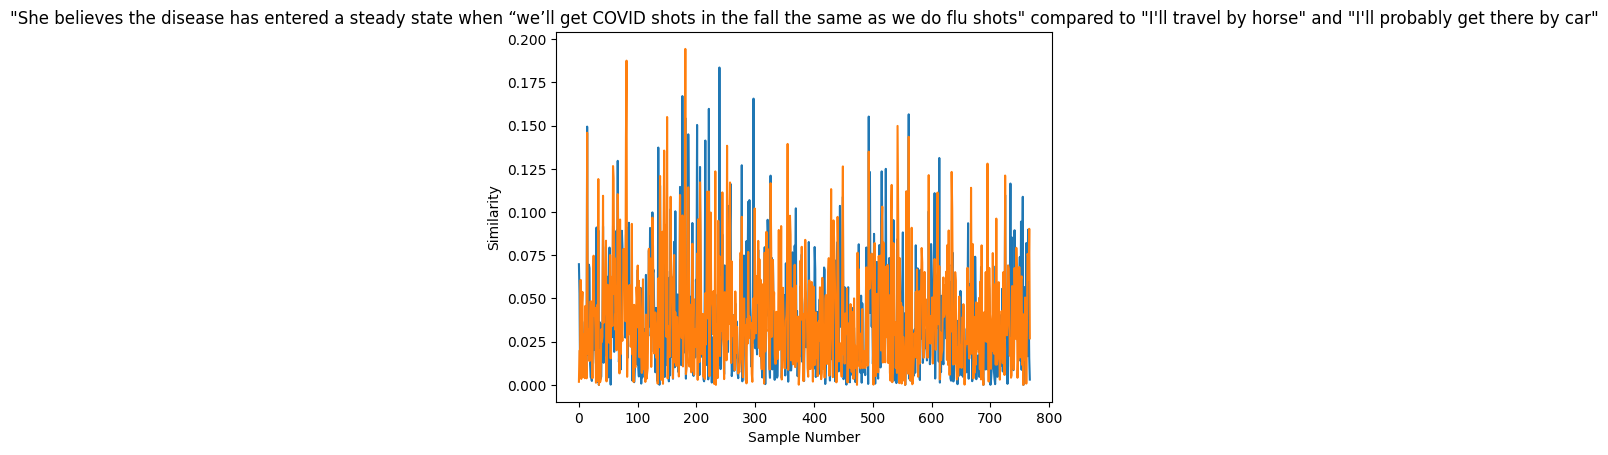

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for I'll travel by horse: 0.05884511023759842
Similarity Score for I'll probably get there by car: 0.012259943410754204


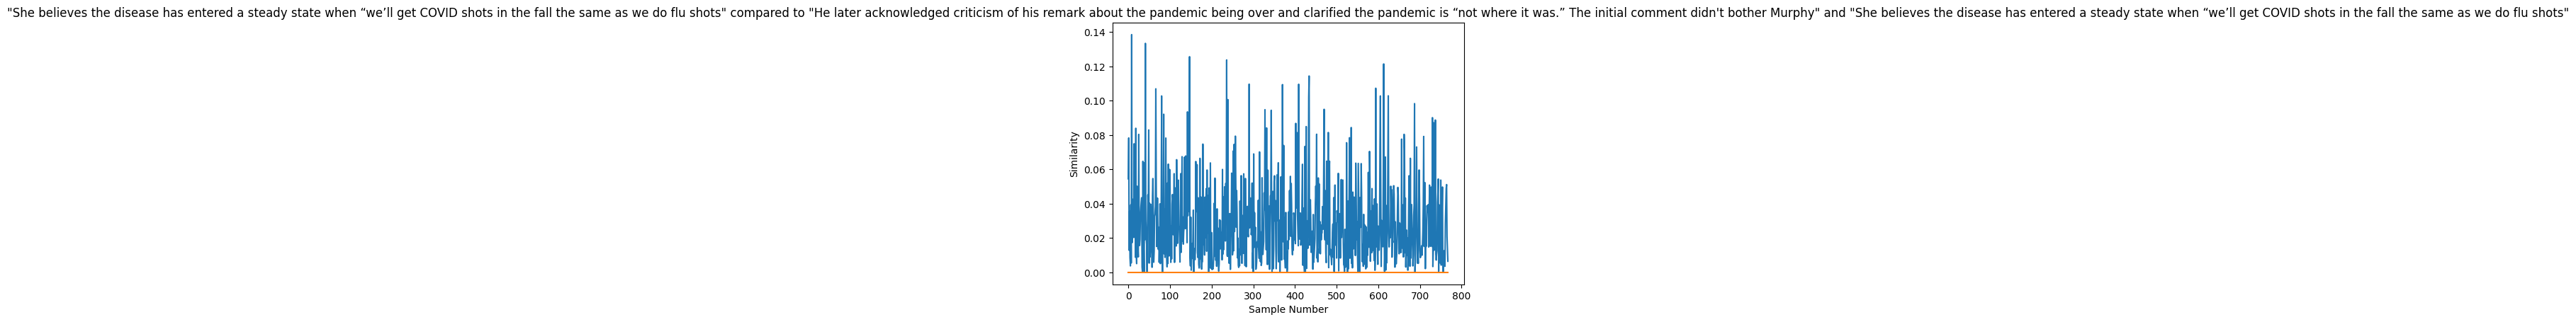

Anchor Sentence: She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots
Similarity Score for He later acknowledged criticism of his remark about the pandemic being over and clarified the pandemic is “not where it was.” The initial comment didn't bother Murphy: 0.441463440656662
Similarity Score for She believes the disease has entered a steady state when “we’ll get COVID shots in the fall the same as we do flu shots: 1.0


In [ ]:


for i in range(len(arr)):
    if base == i:
        continue
    val = arr[base] * arr[i]
    compare(np.abs(arr[i] - arr[base]) , np.abs(arr[i -1] - arr[base]) , title=f"\"{arr_string[base]}\" compared to \"{arr_string[i]}\" and \"{arr_string[i -1]}\"", secondTensor=True)
    print(f"Anchor Sentence: {arr_string[base]}")
    print(f"Similarity Score for {arr_string[i]}: {util.dot_score(arr[base], arr[i])[0][0]}")
    print(f"Similarity Score for {arr_string[i - 1]}: {util.dot_score(arr[base], arr[i - 1])[0][0]}")

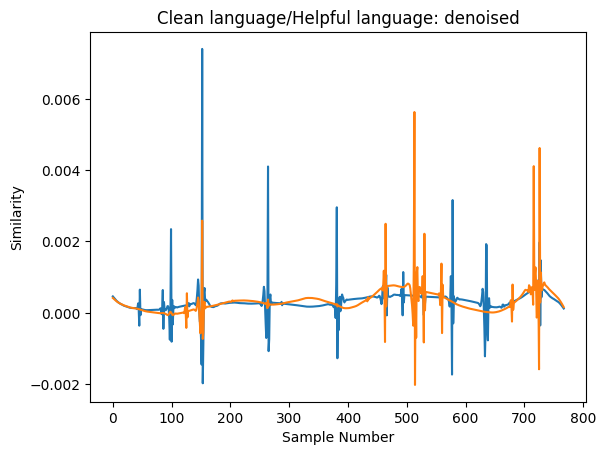

 Similarity: 0.5728775858879089
R^2: 0.14574894502948177
Phase difference -0.0013020833333333333
0.5728776


/home/marcuswrrn/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


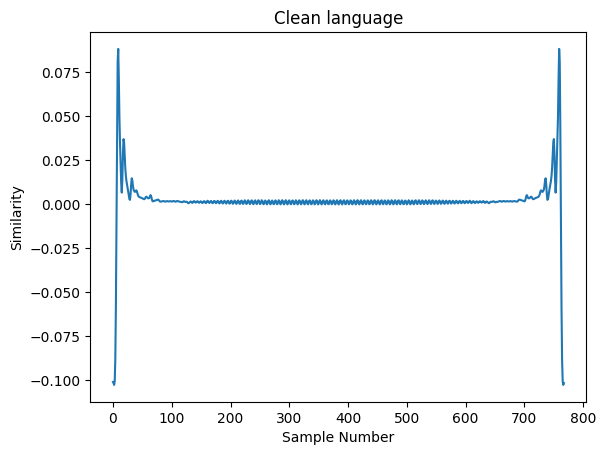

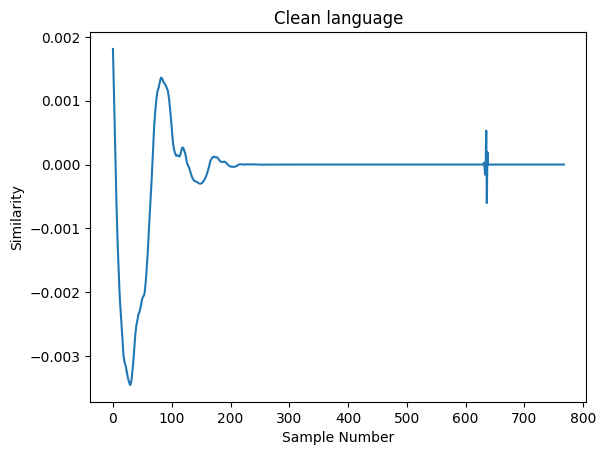

In [ ]:
from sklearn.metrics import r2_score
from scipy.signal import correlate

i = 2
j = 8

#compare(arr[i], arr[j], f"{arr_string[i]}/{arr_string[j]}: base")
compare_denoized(arr[i] * arr[j], arr[i-1] * arr[j], f"{arr_string[i]}/{arr_string[j]}: denoised", secondTensor=True)
#compare_denoized(arr[i-1], arr[j], f"{arr_string[i-1]} compared to {arr_string[j]}")
print(f" Similarity: {util.dot_score(arr[i], arr[j])[0][0]}")
print(f"R^2: {r2_score(arr[i], arr[j])}")

corr = correlate(arr[i], arr[j])
max_index = np.argmax(corr)

phase_diff = (max_index - len(arr[i]))/len(arr[i])
print(f"Phase difference {phase_diff}")

print(np.sum(arr[i] * arr[j]))
plot(np.fft.fft(denoize(arr[i])), title=f"{arr_string[i]}")
plot(denoize(arr[i]), title=f"{arr_string[i]}")


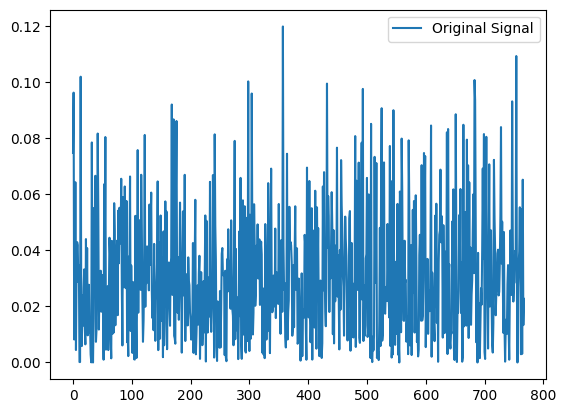

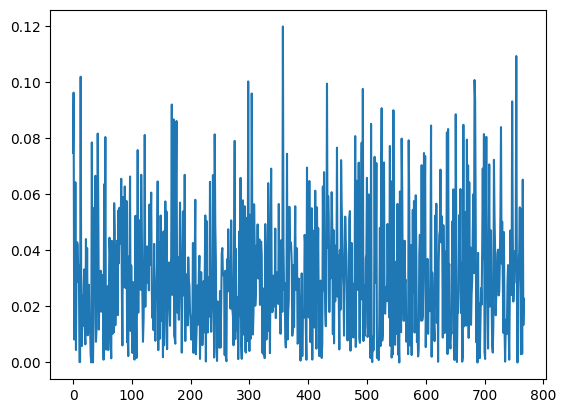

Is Equal: False


In [ ]:

# Generate a noisy signal
t = np.arange(len(arr[i]))
x = np.abs(arr[i] - arr[i-1])

# Compute the Fourier transform of the signal
X = np.fft.fft(x)

# Define the filter
cutoff_freq = 4
nyquist_freq = 0.5 / (t[1] - t[0])
cutoff_index = int(cutoff_freq / nyquist_freq * len(t))
filter = np.zeros(len(t))
filter[:cutoff_index] = 1
filter[-cutoff_index:] = 1

# Apply the filter to the Fourier coefficients
X_filtered = X * filter

# Compute the inverse Fourier transform of the filtered coefficients
x_filtered = np.real(np.fft.ifft(X_filtered))

# Plot the original and filtered signals
plt.plot(t, x, label='Original Signal')
#plt.plot(t, x_filtered, label='Filtered Signal')
plt.legend()
plt.show()
plt.plot(t, x_filtered, label='Filtered Signal')
plt.show()

is_equal = True
for val1, val2 in zip(x, x_filtered):
    if val1 != val2:
        is_equal = False
        break

print(f"Is Equal: {is_equal}")
